# Data Science Final Exam

## Dear Students,<br><br>Welcome to your final exam in data science. Remember that the true essence of data science lies not only in obtaining results but in extracting meaningful insights.<br><br>In this examination we encourage you to focus not just on the output your code generates but on the story it tells. Sometimes, peculiar outcomes can act as beacons, signaling potential issues in your code or data. Rather than dismissing them, consider these anomalies as opportunities to refine your analysis and enhance your problem-solving skills.<br><br>As you progress through the tasks, think of your comments as a roadmap for others to follow your analytical journey. Clearly articulate your intentions before executing code, detail the steps you took, and, most importantly, provide a comprehensive interpretation of your results. A well-documented analysis not only showcases your technical proficiency but also your ability to think critically about the data at hand.<br><br>Remember, data science is not merely about crunching numbers; it's about crafting narratives that guide decision-making. Each line of code you write and every graph you create contributes to a broader story. Make sure your commentary reflects this understanding, and don't hesitate to acknowledge any challenges or uncertainties you encounter along the way.<br><br>Best of luck!

## Task 1. Hypothesis Testing (2 points)


**The data for this task is in `task_1.csv`**

#### Data task_1.csv:
* index - enumeration
* women_1 - weights of women observed (1st group)
* women_2 - weights of women observed (2nd group)
* men - weights of men observed

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('task_1.csv')
df.head()

,index,women_1,women_2,men
0,0,73.098928,78.0,88.274204
1,1,73.613758,65.0,85.956865
2,2,56.480751,65.0,66.678725
3,3,81.904591,91.0,69.819411
4,4,67.361169,104.0,75.928297


### 1.1 Check normality assumption for women_1 and women_2.

In [130]:
from scipy.stats import shapiro

# Check normality for women_1
stat_women_1, p_value_women_1 = shapiro(df['women_1'])
print('stat_women_1= %.3f, p_value_women_1= %.3f' % (stat_women_1, p_value_women_1))

if p_value_women_1 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat_women_1= 0.998, p_value_women_1= 0.462
Probably Gaussian


<Figure size 800x600 with 0 Axes>

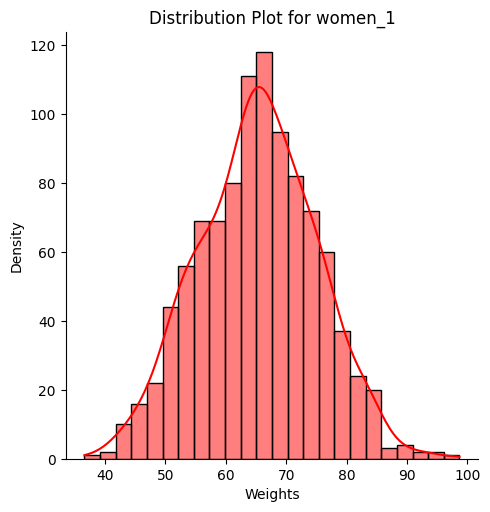

In [131]:
plt.figure(figsize=(8, 6))
sns.displot(df['women_1'], kde=True, color='red')

plt.title('Distribution Plot for women_1')
plt.xlabel('Weights')
plt.ylabel('Density')
plt.show()

In [132]:
# Check normality for women_2
stat_women_2, p_value_women_2 = shapiro(df['women_2'])
print('stat_women_2 = %.3f, p_value_women_2 = %.3f' % (stat_women_2, p_value_women_2))

if p_value_women_2 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat_women_2 = 0.975, p_value_women_2 = 0.000
Probably not Gaussian


<Figure size 800x600 with 0 Axes>

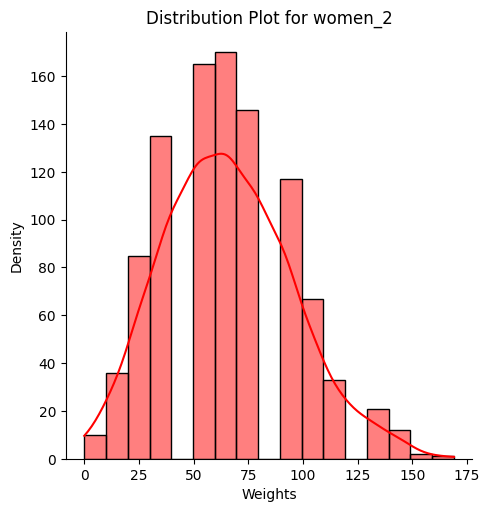

In [133]:
plt.figure(figsize=(8, 6))
sns.displot(df['women_2'], kde=True, color='red')

plt.title('Distribution Plot for women_2')
plt.xlabel('Weights')
plt.ylabel('Density')
plt.show()


### 1.2 Check one of the following hypotheses (based on where the normality assumption is met) using t-test with appropriate paramenters:

**1.**
* HO - women_1 have bigger weight than men
* H1 - they are not

**2.**
* HO - women_2 have the same weight as men
* H1 - they are not

In [134]:
# Check normality for men

stat_men, p_value_men = shapiro(df['men'])
print('stat_men = %.3f, p_value_men = %.3f' % (stat_men, p_value_men))

if p_value_men > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat_men = 0.999, p_value_men = 0.880
Probably Gaussian


In [135]:
# Check the first hypothesis
from scipy.stats import ttest_ind

stat, p = ttest_ind(df['women_1'], df['men'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Don't reject the null hypothesis.")

stat=-32.567, p=0.000
Reject the null hypothesis.


## Task 2. ANOVA (2 points)

Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

 A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below.

Key steps to follow:

* Checking assumptions for ANOVA
* Performing Anova
* Interpret the results (in markdown or as a comment)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
anova_raw = {
    'Normal Bone Density': [1200, 1000, 980, 900, 750, 800],
    'Osteopenia': [1000, 1100, 700, 800, 500, 700],
    'Osteoporosis': [890, 650, 1100, 900, 400, 350]
}

In [138]:
df = pd.DataFrame(anova_raw)
df = df.melt(var_name='Group', value_name='Calcium')
df

,Group,Calcium
0,Normal Bone Density,1200
1,Normal Bone Density,1000
2,Normal Bone Density,980
3,Normal Bone Density,900
4,Normal Bone Density,750
5,Normal Bone Density,800
6,Osteopenia,1000
7,Osteopenia,1100
8,Osteopenia,700
9,Osteopenia,800


### 2.1 Check assumptions for normality using Shapiro-Wilk test

In [139]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

formula = 'Calcium ~ Group'
model = ols(formula, data=df).fit()

res = model.resid
shapiro_test = shapiro(res)
print(shapiro_test)

if res[1] > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


ShapiroResult(statistic=0.9709510207176208, pvalue=0.8153743743896484)
Probably Gaussian


### 2.2 Сheck the assumption of homogeneity of variances

In [140]:
! pip install pingouin

In [141]:
import pingouin as pg

pg.homoscedasticity(anova_raw, dv = 'Calcium', group='Group').round(2)

,W,pval,equal_var
levene,1.63,0.23,True


### 2.3 Perform ANOVA and interpret the results

In [142]:
res = pg.anova(dv='Calcium', between='Group', data=df, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,np2
0,Group,152477.777778,2,76238.888889,1.394897,0.278229,0.15682
1,Within,819833.333333,15,54655.555556,NaN,NaN,NaN


In [143]:
if res['p-unc'][0] < 0.05:
  print("Reject the null hypothesis.")
else:
  print("Don't reject the null hypothesis.")

Don't reject the null hypothesis.


## Task 3. Linear Regression

Given the Dataset in `task_3.csv` make some necessary transformations and train regression model to predict flight tickets' price.

### Dataset Description

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**Features**

The various features of the cleaned dataset are explained below:

1) **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having **6 different airlines.**


2) **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.


3) **Source City**: City from which the flight takes off. It is a categorical feature having **6 unique cities**.


4) **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have **6 unique time labels**.


5) **Stops**: A categorical feature with **3 distinct values** that stores the number of stops between the source and destination cities.


6) **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has **six distinct time labels** and keeps information about the arrival time.


7) **Destination City**: City where the flight will land. It is a categorical feature having **6 unique** cities.


8) **Class**: A categorical feature that contains information on seat class; it has **two** distinct values: **Business and Economy**.


9) **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.


10) **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.


11) **Price**: Target variable stores information of the ticket price.

*Dataset is already cleaned*


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('task_3.csv')
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 3.1 Data Transformation:

- Transform categorical variables to numeric form. Decide on the most appropriate method, such as one-hot encoding, label encoding, or any other relevant technique.
- Provide justifications for the chosen transformation method and discuss any variables that might be excluded.

In [145]:
!pip install category_encoders

In [146]:
# airline, source_city, departure_time, stops, arrival_time, destination_city, class

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce

# airline: (nominal variables, small Dimensional, important for precise predictions) -> One-Hot Encoding is preferable over Binary Encoding for certain machine learning algorithms.
def transform_airline(df):
    ohe = OneHotEncoder(sparse=False)
    airline_encoded = ohe.fit_transform(df[['airline']])
    airline_columns = ohe.get_feature_names_out(['airline'])
    df_airline_encoded = pd.DataFrame(airline_encoded, columns=airline_columns)

    df = df.drop('airline', axis=1)
    df = pd.concat([df, df_airline_encoded], axis=1)
    return df


# source_city: (nominal variables, small Dimensional, not important for precise predictions) -> BinaryEncoder.
def transform_source_city(df):
    encoder = ce.BinaryEncoder(cols=['source_city'], drop_invariant=True)
    source_city_encoded = encoder.fit_transform(df['source_city'])
    df = df.drop(['source_city'], axis=1)
    df = pd.concat([df, source_city_encoded], axis=1)
    return df


# destination_city: (nominal variables, small Dimensional, not important for precise predictions) -> BinaryEncoder.
def transform_destination_city(df):
    encoder = ce.BinaryEncoder(cols=['destination_city'], drop_invariant=True)
    destination_city_encoded = encoder.fit_transform(df['destination_city'])
    df = df.drop(['destination_city'], axis=1)
    df = pd.concat([df, destination_city_encoded], axis=1)
    return df


# departure_time: (ordinal categorical, not intereste with the differences between categories) -> OrdinalEncoder
def transform_departure_time(df):
    encoder = OrdinalEncoder()
    df['departure_time'] = encoder.fit_transform(df[['departure_time']])
    return df

# arrival_time: (ordinal categorical, not intereste with the differences between categories) -> OrdinalEncoder
def transform_arrival_time(df):
    encoder = OrdinalEncoder()
    df['arrival_time'] = encoder.fit_transform(df[['arrival_time']])
    return df


# stops: the correlation between (stops) and (duration) is important.
def transform_stops(df):
    mean = df.groupby('stops')['duration'].mean()
    df['stops'] = df['stops'].map(mean)
    df['stops'] = df['stops'].apply(lambda x: f'{x:.2f}')
    return df

# stops: the correlation between (class) and (price) is important.
def transformy_class(df):
    mean = df.groupby('class')['price'].mean()
    df['class'] = df['class'].map(mean)
    df['class'] = df['class'].apply(lambda x: f'{x:.2f}')
    return df

def transform_features(df):
    df = transform_airline(df)
    df = transform_source_city(df)
    df = transform_destination_city(df)
    df = transform_departure_time(df)
    df = transform_arrival_time(df)
    df = transform_stops(df)
    df = transformy_class(df)

    return df
#---------------------------------------------------------------------------

df = transform_features(df)
df = df.drop(['flight'], axis=1)   # flight is not important for precise predictions.
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,departure_time,stops,arrival_time,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_0,source_city_1,source_city_2,destination_city_0,destination_city_1,destination_city_2
0,0,2.0,2.19,5.0,6572.34,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,1
1,1,1.0,2.19,4.0,6572.34,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,1
2,2,1.0,2.19,1.0,6572.34,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1
3,3,4.0,2.19,0.0,6572.34,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1
4,4,4.0,2.19,4.0,6572.34,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,4.0,13.50,2.0,52540.08,10.08,49,69265,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,0,0
300149,300149,0.0,13.50,5.0,52540.08,10.42,49,77105,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,0,0
300150,300150,1.0,13.50,5.0,52540.08,13.83,49,79099,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,0,0
300151,300151,1.0,13.50,2.0,52540.08,10.00,49,81585,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,0,0


### 3.2 Visualization of Variables:

- Visualize the correlation between variables. Use techniques like correlation matrices or heatmap to represent relationships between different features.
- Discuss any interesting observations or patterns identified during visualization.

<ipython-input-147-d2d8ed157f65>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


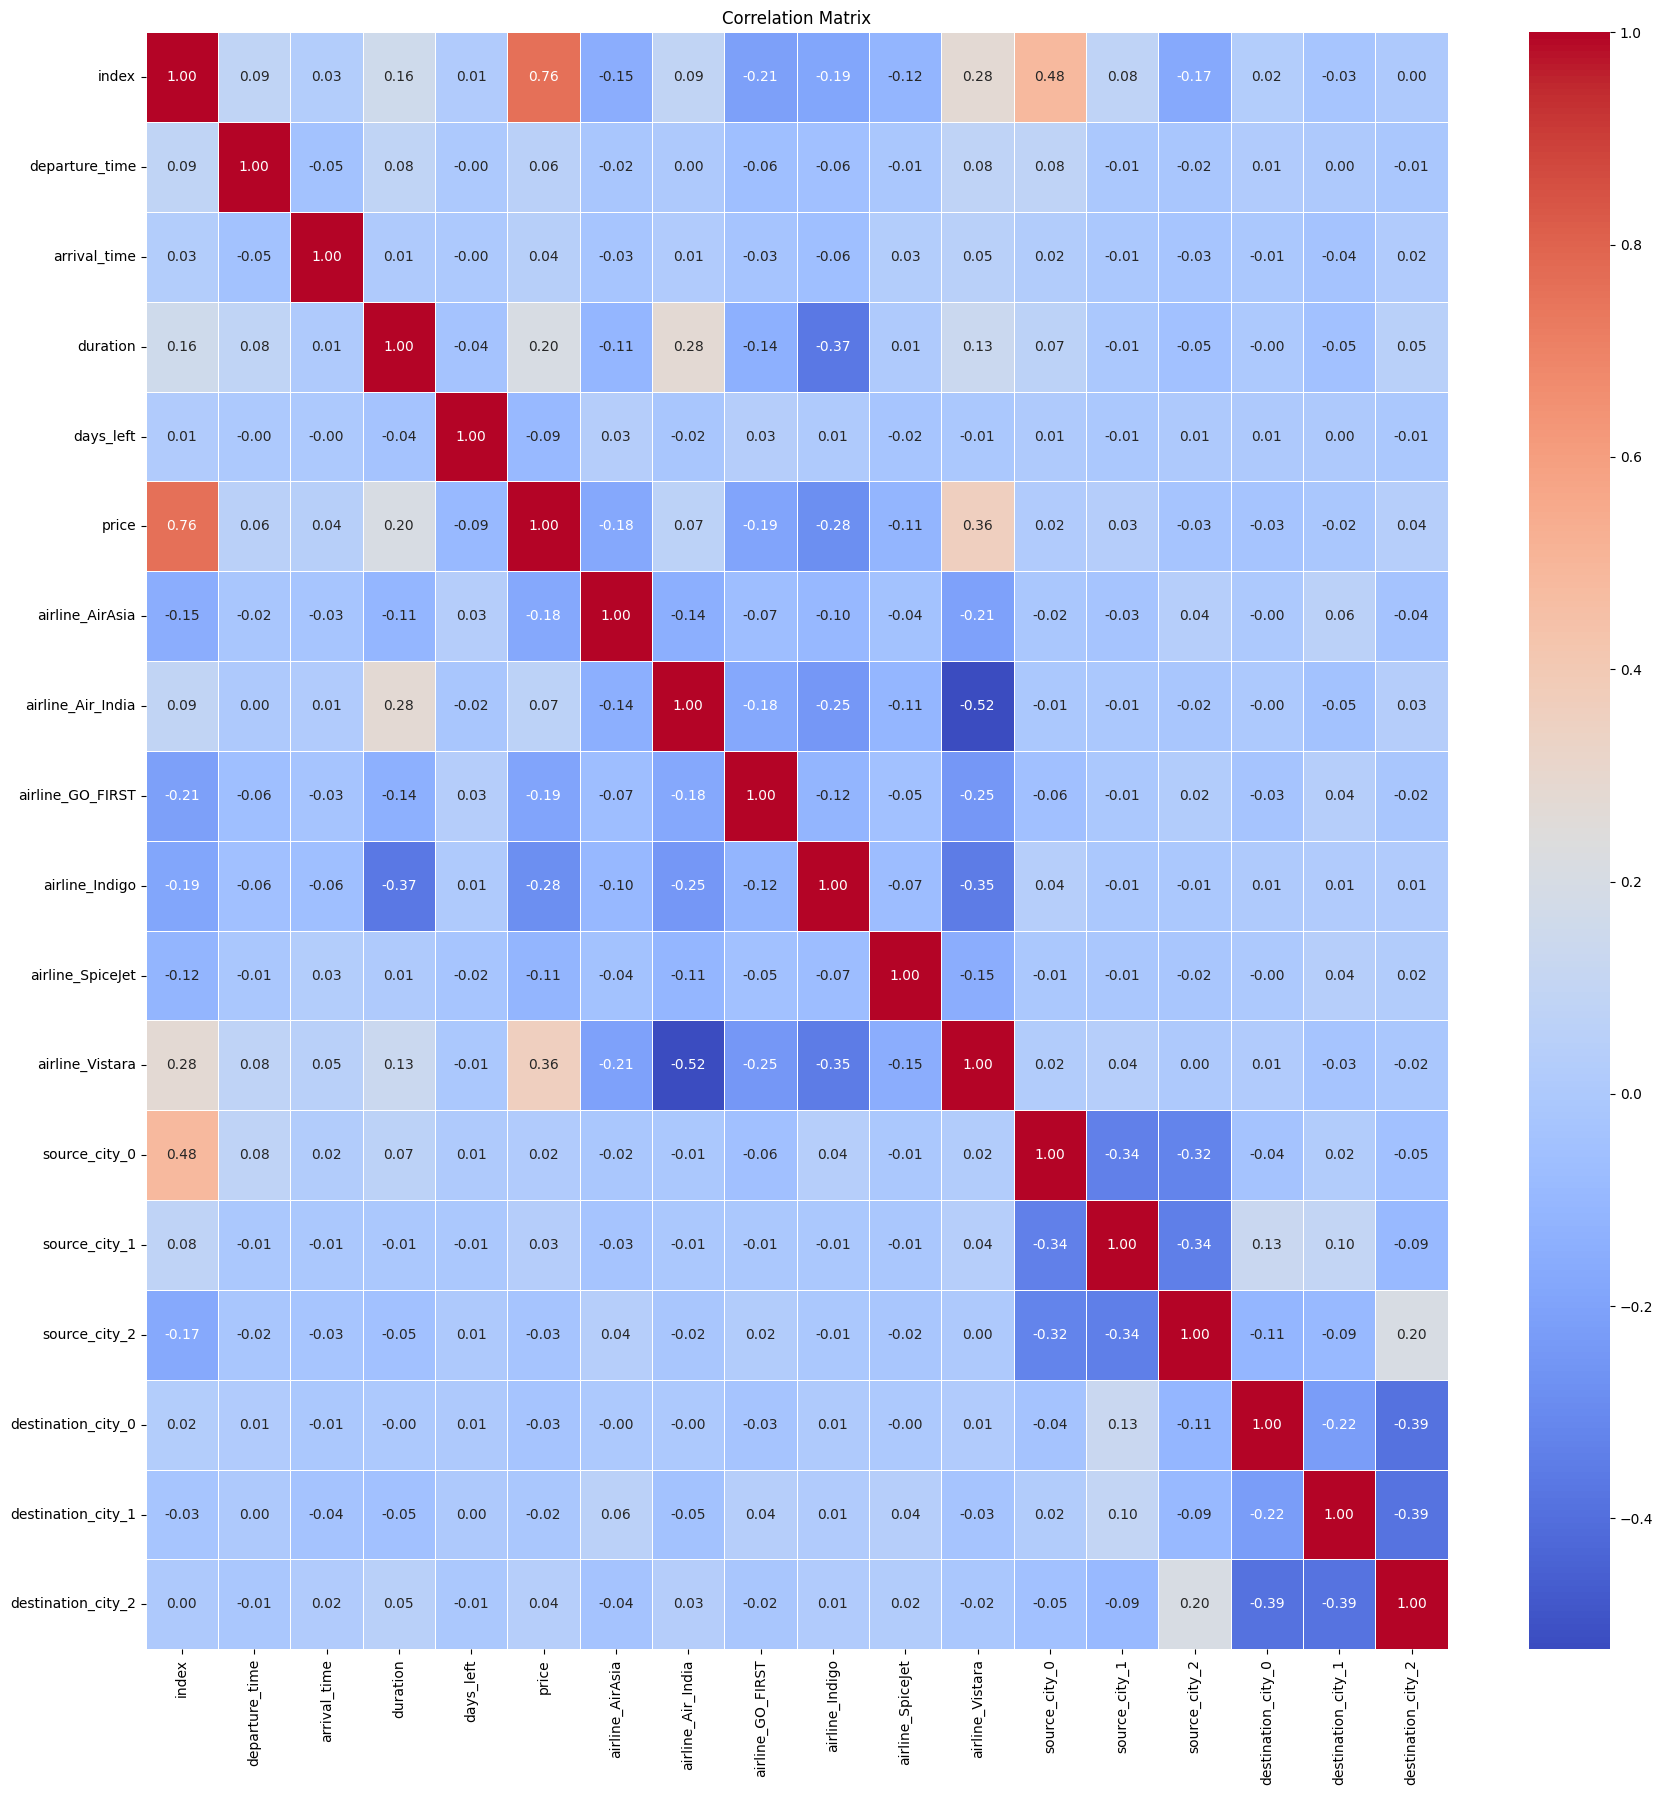

In [147]:
cm = df.corr()

plt.figure(figsize=(21, 21))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Discuss**

- (class) has high positive correlation with the target (price)
- (duration) has high positive correlation with (stops)


### 3.3 Optional Graphs:

- Create additional graphs that you find helpful and insightful for understanding the dataset.
- Examples of optional graphs include distribution plots, box plots, or any other visualization that might provide useful insights.

### 3.4 Linear Regression:
- Perform linear regression to predict ticket prices based on relevant independent variables. Choose variables that are likely to influence the ticket price.
- Evaluate the results using R squared (coefficient of determination) to assess the goodness of fit of the regression model.
- Provide interpretation of the coefficients and discuss the overall performance of the model.

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [149]:
X = df[['class', 'duration', 'airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [150]:
R_squared = r2_score(y_test, y_pred)
print(f'R-squared: {R_squared}')

R-squared: 0.8920115939838532


## Task 4. Classification (3 points)

Given the Dataset in `task_4.csv` make some necessary transformations and train the model to classify the obesity type.

### Dataset Description

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level), that allows classification of the data** using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

----
**The attributes related with eating habits are:**

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

-----
**The attributes related with the physical condition are:**

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

other variables obtained were: Gender, Age, Height and Weight.

------

**Questions of the survey used for initial recollection of information**

Question (Possible Answers)

* What is your gender?	•Female •Male
* What is your age?	Numeric value
* What is your height?	Numeric value in meters
* What is your weight?	Numeric value in kilograms
* Has a family member suffered or suffers from overweight?	•Yes •No
* Do you eat high caloric food frequently? •Yes •No
* Do you usually eat vegetables in your meals?	•Never •Sometimes •Always
* How many main meals do you have daily?	•Between 1 y 2 •Three •More than three
* Do you eat any food between meals? •No •Sometimes •Frequently •Always
* Do you smoke? •Yes •No
* How much water do you drink daily? •Less than a liter •Between 1 and 2 L •More than 2 L
* Do you monitor the calories you eat daily? •Yes •No
* How often do you have physical activity? •I do not have •1 or 2 days •2 or 4 days •4 or 5 days
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? •0–2 hours •3–5 hours •More than 5 hours
* How often do you drink alcohol? •I do not drink •Sometimes •Frequently •Always
* Which transportation do you usually use? •Automobile •Motorbike •Bike •Public Transportation •Walking


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('task_4.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### 4.1 Data Preparation:

- Identify and handle missing values, outliers, or any other data quality issues.
- Convert categorical variables into a suitable format for modeling.
- Discuss any decisions made during the data cleaning process.

In [152]:
print(df.isnull().sum())
# There is no missing values in the database

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [153]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
outliers = (np.abs(z_scores) > 3).all(axis=1)

print(f'outliers = {outliers.sum()}')
# There is no outliers in the database

outliers = 0


**Data Transformation:**

In [154]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce

def transform_NObeyesdad(df):
    encoder = OrdinalEncoder()
    df['NObeyesdad_encoded'] = encoder.fit_transform(df[['NObeyesdad']])
    return df

def transformy_gender(df):
    mean = df.groupby('Gender')['NObeyesdad_encoded'].mean()
    df['Gender'] = df['Gender'].map(mean)
    df['Gender'] = df['Gender'].apply(lambda x: f'{x:.2f}')

    return df

def transformy_family_history_with_overweight(df):
    mean = df.groupby('family_history_with_overweight')['NObeyesdad_encoded'].mean()
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map(mean)
    df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(lambda x: f'{x:.2f}')

    return df

def transformy_FAVC(df):
    mean = df.groupby('FAVC')['NObeyesdad_encoded'].mean()
    df['FAVC'] = df['FAVC'].map(mean)
    df['FAVC'] = df['FAVC'].apply(lambda x: f'{x:.2f}')
    return df

def transformy_SMOKE(df):
    mean = df.groupby('SMOKE')['NObeyesdad_encoded'].mean()
    df['SMOKE'] = df['SMOKE'].map(mean)
    df['SMOKE'] = df['SMOKE'].apply(lambda x: f'{x:.2f}')
    return df

def transformy_SCC(df):
    mean = df.groupby('SCC')['NObeyesdad_encoded'].mean()
    df['SCC'] = df['SCC'].map(mean)
    df['SCC'] = df['SCC'].apply(lambda x: f'{x:.2f}')
    return df

def transform_CAEC(df):
    encoder = OrdinalEncoder()
    df['CAEC'] = encoder.fit_transform(df[['CAEC']])
    return df

def transform_CALC(df):
    encoder = OrdinalEncoder()
    df['CALC'] = encoder.fit_transform(df[['CALC']])
    return df

def transform_MTRANS(df):
    ohe = OneHotEncoder(sparse=False)
    MTRANS_encoded = ohe.fit_transform(df[['MTRANS']])
    MTRANS_columns = ohe.get_feature_names_out(['MTRANS'])
    df_MTRANS_encoded = pd.DataFrame(MTRANS_encoded, columns=MTRANS_columns)

    df = df.drop('MTRANS', axis=1)
    df = pd.concat([df, df_MTRANS_encoded], axis=1)
    return df

def transform_features(df):
    df = transform_NObeyesdad(df)
    df = transformy_gender(df)
    df = transformy_family_history_with_overweight(df)
    df = transformy_FAVC(df)
    df = transformy_SMOKE(df)
    df = transformy_SCC(df)
    df = transform_CAEC(df)
    df = transform_CALC(df)
    df = transform_MTRANS(df)

    return df

df = transform_features(df)
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,NObeyesdad_encoded,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,2.97,21.000000,1.620000,64.000000,3.30,2.78,2.0,3.0,2.0,3.02,...,0.000000,1.000000,3.0,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0
1,2.97,21.000000,1.520000,56.000000,3.30,2.78,3.0,3.0,2.0,2.70,...,3.000000,0.000000,2.0,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0
2,3.06,23.000000,1.800000,77.000000,3.30,2.78,2.0,3.0,2.0,3.02,...,2.000000,1.000000,1.0,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0
3,3.06,27.000000,1.800000,87.000000,1.72,2.78,3.0,3.0,2.0,3.02,...,2.000000,0.000000,1.0,Overweight_Level_I,5.0,0.0,0.0,0.0,0.0,1.0
4,3.06,22.000000,1.780000,89.800000,1.72,2.78,2.0,1.0,2.0,3.02,...,0.000000,0.000000,2.0,Overweight_Level_II,6.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2.97,20.976842,1.710730,131.408528,3.30,3.05,3.0,3.0,2.0,3.02,...,1.676269,0.906247,2.0,Obesity_Type_III,4.0,0.0,0.0,0.0,1.0,0.0
2107,2.97,21.982942,1.748584,133.742943,3.30,3.05,3.0,3.0,2.0,3.02,...,1.341390,0.599270,2.0,Obesity_Type_III,4.0,0.0,0.0,0.0,1.0,0.0
2108,2.97,22.524036,1.752206,133.689352,3.30,3.05,3.0,3.0,2.0,3.02,...,1.414209,0.646288,2.0,Obesity_Type_III,4.0,0.0,0.0,0.0,1.0,0.0
2109,2.97,24.361936,1.739450,133.346641,3.30,3.05,3.0,3.0,2.0,3.02,...,1.139107,0.586035,2.0,Obesity_Type_III,4.0,0.0,0.0,0.0,1.0,0.0


### 4.2 Training and Hyperparameter Tuning::

- Select a classification model for predicting 'NObeyesdad'
- Split the dataset into training and testing sets.
- Train the chosen model on the training set.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [156]:
X = df[['Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS_Automobile','MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']]

y = df['NObeyesdad_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

### 4.3 Model Evaluation:

- Evaluate the trained model on the testing set.
- Choose appropriate evaluation metrics for a classification task (e.g., accuracy, precision, recall, F1-score).

In [157]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9385342789598109
